![Py4Eng](img/logo.png)

# Numerical & symbolic calculus
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='white',
    context='notebook',
    font_scale=1.5
)

from scipy import integrate

We will demonstrate how to preform integration in Python using *SciPy* for numerical integration and *SymPy* for symbolic integration.

# Numerical integration with SciPy

There are several numerical integration methods in `scipy.integrate`:

In [2]:
integrate?

Let's experiment with the `scipy.integrate.quad` method.

In [3]:
integrate.quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx`` 
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``a

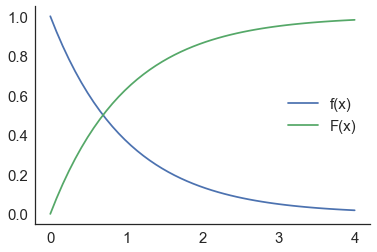

In [4]:
x = np.linspace(0, 4)
def f(x): 
    return np.exp(-x)

@np.vectorize # vectorize lets F work on arrays rather than scalars
def F(x):
    return integrate.quad(f, a=0, b=x)[0]

plt.plot(x, f(x), label='f(x)')
plt.plot(x, F(x), label='F(x)')
plt.legend()
sns.despine()

## Exercise - Numerical integration

Integrate the function $\frac{\log(t)}{1+t}$ from $1$ to $x$ using one of the integration functions in `scipy.integrate` and plot the results for $x \in (1,2)$.

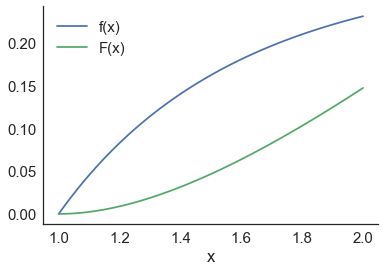

## Exercise - Numerical differentiation

Use `scipy.misc.derivative` to differentiate the function $\frac{\log{t}}{1+t}$ and plot the result for $t \in (1, 2)$.

In [5]:
from scipy.misc import derivative

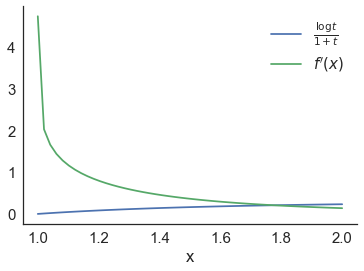

# Sybmolic integration with *SymPy*

[![SymPy logo](http://docs.sympy.org/latest/_static/sympylogo.png)](http://sympy.org/)

*SymPy* is a Python package for symbolic mathematics. It has many capabilities, but right now we will focus on symbolic integration. Install with `conda install sympy` or `pip install sympy`.

In [6]:
import sympy
print("SymPy version:", sympy.__version__)
sympy.init_printing() # for notebook display

SymPy version: 1.1.1


First we must define our symbols. As we are working with a single variable functions, we only need `x`:

In [7]:
t = sympy.symbols('t')
f = sympy.exp(-t)
f

In [73]:
sympy.integrate?

In [8]:
F = sympy.integrate(f, t)
F

To evaluate a function we use the `evalf` methods and define the substitution from a symbol to a number.

We can also produce a definite integral.

In [16]:
fx = [f.evalf(subs={t: xi}) for xi in x]
F0 = F.evalf(subs={t: 0})
Fx = [F.evalf(subs={t: xi}) - F0 for xi in x] # I can also use sympy.integrate(f, (t, 0, xi)) but it is slower

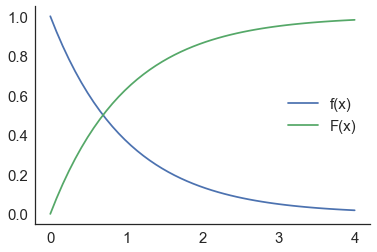

In [17]:
plt.plot(x, fx, label='f(x)')
plt.plot(x, Fx, label='F(x)')
plt.legend(loc='center right')
sns.despine()

## Exercise - Symbolic differentiation

Calculate the derivative of  $\frac{\log{t}}{1+t}$ with respect to $t$ using `sympy.diff`.
Print it and and plot it for $t \in (1, 2)$. Compare the result with the numerical differentiation result from above.

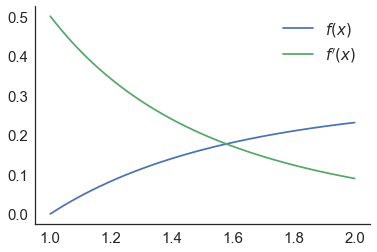

## SymPy - more

SymPy can do much more.

For example, solve equation systems:

In [19]:
x, y,z  = sympy.symbols('x y z')

eqs = (
    x + 5*y - 2, 
    -3*x + 6*y - 15
)

sol = sympy.solve(eqs, (x, y))
sol

In [20]:
eqs[0].subs(sol), eqs[1].subs(sol)

Find a limit:

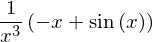

In [21]:
expr = (sympy.sin(x) - x) / x**3
expr

In [22]:
sympy.limit(expr, x, 0)

# Automatic differentiation with `autograd`

# Automatic Differentiation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is a different kind of a differentiation algorithm.

There are different ways to implement automatic differentiation, but the idea is the same.
Given a computer-function `f(x)` that computes the math-function $f(x)$, automatic differentiation is an algorithm that produces the computer-function `df(x)` which computes the math-function $\frac{d}{dx}f(x)$.

![](https://upload.wikimedia.org/wikipedia/commons/3/3c/AutomaticDifferentiationNutshell.png)

This can accomplished when all operations made by `f(x)` are differentiable in the sense that their derivative can be computed.
If all such operations are differentiable, then `df(x)` can be produced by applying the chain-rule, similar to *back-propagation* in neural networks.

In Python, automatic differentiation is implemented by several packages, but we are going to use the [AutoGrad](https://github.com/HIPS/autograd) package which is specifically designed for use with NumPy in neural network applications.

Install with: `conda install autograd -c conda-forge`

## Example

`f(x, y, p)` implements the function:
$$
f_p(x,y) = x^2 +2pxy +y^2
$$
such that 
$$
f_1(x,y) = (x+y)^2 \\
f_{-1}(x,y)=(x-y)^2 \\ 
f_0(x,y)=x^2+y^2
$$

In [23]:
def f(x, y, p=0):
    z = x**2 # dz/dx = 2*x; dz/dy = 0
    v = y**2 # dv/dx = 0; dv/dy = 2*y
    u = 2*p*x*y # du/dx = 2*p*y;  du/dy = 2*p*x
    q = z + v + u # dq/dx = dz/dx + dv/dx + du/dx; dq/dy = ...
    return q # dq/dx; dq/dy

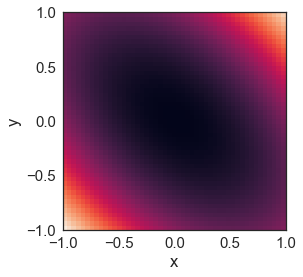

In [34]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1).reshape(-1, 1)
p = 0.5

Z = f(x, y, p)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolormesh(x, y, Z)
ax.set(xlabel='x', ylabel='y', 
       xticks=np.linspace(x.min(), x.max(), 5), 
       yticks=np.linspace(y.min(), y.max(), 5));

We now calculate and plot the gradient of `f(x, y, p)` w.r.t `x` and `y` using two functions, `dfdx(x, y, p)` and `dfdy(x, y, p)`. 

To do that, we use the function `grad` from the package [AutoGrad](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md).

In [45]:
from autograd import grad

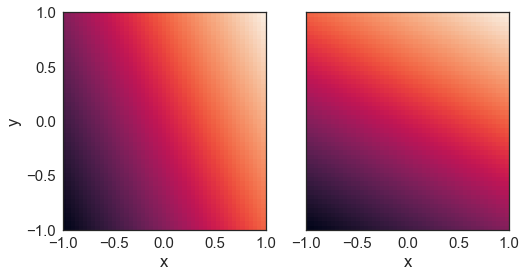

In [46]:
dfdx = grad(f, 0)
dfdx = np.vectorize(dfdx)
dfdy = grad(f, 1)
dfdy = np.vectorize(dfdy)

p = 0.5
Zx = dfdx(x, y, p)
Zy = dfdy(x, y, p)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axes[0].pcolormesh(x, y, Zx)
axes[1].pcolormesh(x, y, Zy)
axes[0].set(xlabel='x', ylabel='y', xticks=np.linspace(x.min(), x.max(), 5), yticks=np.linspace(y.min(), y.max(), 5));
axes[1].set(xlabel='x');

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.1.
Dependencies listed in [environment.yml](../environment.yml), full versions in [environment_full.yml](../environment_full.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)